<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [1]:
import os, cv2, glob, time
import numpy as np
import pickle as pkl

import matplotlib.pyplot as plt

# Set Constants

In [2]:
# Constants
WIDTH, HEIGHT = 256, 256
CROP_WIDTH, CROP_HEIGHT = 32, 32
CROP_IMAGE_NUMBER = (WIDTH // CROP_WIDTH) * (HEIGHT // CROP_HEIGHT)
MAX_ROW, MAX_COL = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
print( 'Crop image number:', CROP_IMAGE_NUMBER )

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '22',
    'date' : '06-20-2021',
    'description' : 'bitmap 파일로 변경\n'
    }

ROOT_DIR = os.getcwd()
os.chdir(ROOT_DIR)
print('Root dir:', os.getcwd())

GEOLIFE_DIR = os.path.join('C:\\', 'Dataset', 'Geolife')
IMAGE_DIR = os.path.join(GEOLIFE_DIR, 'Image_Files')
LOW_DIR = os.path.join(GEOLIFE_DIR, 'Low_Dimension')
BITMAP_DIR = os.path.join(GEOLIFE_DIR, 'Bitmap')

RESULT_DIR = os.path.join( 'C:\\', 'GitHub', 'Lab_Experiment', 'Results')

Crop image number: 64
Root dir: c:\GitHub\Lab_Experiment\Trajectory_Clustering


In [3]:
os.chdir(RESULT_DIR)

new_result_dir = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Data"
if (new_result_dir not in os.listdir()):
    os.mkdir( new_result_dir )
os.chdir( new_result_dir )

with open( 'Description.txt', 'w' ) as f:
    f.write( EXPERIMENT_DATA['description'] )

# Check pickle data

## Check all black is same

In [6]:
pkl_load_data1 = []
os.chdir(os.path.join(LOW_DIR,'0th data'))
for data in sorted(glob.glob('*data')):
    with open(data, 'rb') as f:
         pkl_load_data1.append(pkl.load(f))

pkl_load_data2 = []
os.chdir(os.path.join(LOW_DIR, '64th data'))
for data in sorted(glob.glob('*data')):
    with open(data, 'rb') as f:
         pkl_load_data2.append(pkl.load(f))

In [7]:
idx = 0
for i in range(8):
    for j in range(8):
        unique, counts = np.unique((pkl_load_data1[idx] == pkl_load_data2[idx]), return_counts = True)
        print((1 if unique[0] else 0), end = ' ')
        idx += 1
    print('')
# All black is same value!

0 1 1 1 0 1 1 1 
0 1 0 0 0 0 0 0 
0 1 0 1 1 1 0 1 
0 0 0 0 1 1 1 1 
0 1 1 0 1 1 1 1 
0 0 0 0 1 1 1 1 
0 0 0 0 0 0 1 0 
1 0 1 0 0 0 0 0 


In [8]:
os.chdir(os.path.join(LOW_DIR, '0th data'))
with open('00th data', 'rb') as f:
    black_value = pkl.load(f)

In [9]:
pkl_load_data3 = []
os.chdir(os.path.join(LOW_DIR, '128th data'))
for data in sorted(glob.glob('*data')):
    with open(data, 'rb') as f:
         pkl_load_data3.append(pkl.load(f))

In [10]:
idx = 0
for i in range(8):
    for j in range(8):
        unique, counts = np.unique((black_value == pkl_load_data3[idx]), return_counts = True)
        print((1 if unique[0] else 0), end = ' ')
        idx += 1
    print('')
# # All black is same value!

0 1 1 1 1 1 1 1 
0 0 1 1 1 1 1 1 
0 0 0 0 1 1 1 1 
1 0 0 0 0 0 0 1 
1 1 0 0 0 0 0 1 
1 1 0 0 0 0 0 0 
1 1 0 0 0 1 1 1 
1 1 1 1 0 0 1 1 


# Binarization

## Test

In [ ]:
os.chdir(LOW_DIR)

dir_name = '0th data'
bitmap = [[0 for _ in range(MAX_ROW)] for _ in range(MAX_COL)]

os.chdir(os.path.join(LOW_DIR, dir_name))
for idx, file_name in enumerate(sorted(glob.glob('*data'))):
    with open(file_name, 'rb') as f:
        data = pkl.load(f)

    unique, counts = np.unique((black_value == data), return_counts = True)
    bitmap[idx // 8][idx % 8] = ((0 if unique[0] else 255))

os.chdir(BITMAP_DIR)
cv2.imwrite(f'{dir_name}.png', np.array(bitmap))

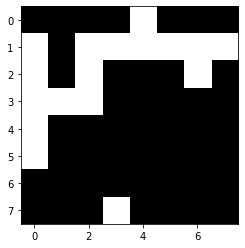

In [13]:
plt.gray()
plt.imshow(cv2.imread(dir_name+'.png', cv2.IMREAD_GRAYSCALE))

## Real Binarization

In [ ]:
os.chdir(LOW_DIR)
for dir_name in sorted(glob.glob('*data')):
    bitmap = [[0 for _ in range(MAX_ROW)] for _ in range(MAX_COL)]

    os.chdir(os.path.join(LOW_DIR, dir_name))
    for idx, file_name in enumerate(sorted(glob.glob('*data'))):
        with open(file_name, 'rb') as f:
            data = pkl.load(f)

        unique, counts = np.unique((black_value == data), return_counts = True)
        bitmap[idx // 8][idx % 8] = ((0 if unique[0] else 255))
    
    os.chdir(BITMAP_DIR)
    cv2.imwrite(f'{dir_name}.png', np.array(bitmap))